<a href="https://colab.research.google.com/github/Srijha09/A-B-Testing-on-Online-Grocery-Store/blob/main/A_B_testing_on_Online_Grocery_Shopping_website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A/B testing is a method of comparing two versions of a webpage, app interface, or marketing element to determine which one performs better. It involves showing two variants (A and B) to different segments of users at the same time and analyzing which variant drives better results.

For an online grocery store, here are 7 metrics that can be tested using A/B testing:

Conversion rate: The percentage of visitors who complete a purchase.

Average order value: The average amount spent per transaction.

Cart abandonment rate: The percentage of users who add items to their cart but don't complete the purchase.

Time spent on site: How long users browse the store before leaving or making a purchase.

Click-through rate (CTR): The percentage of users who click on specific product categories, promotions, or recommended items.

Add-to-cart rate: The frequency at which users add items to their shopping cart.

Repeat purchase rate: The percentage of customers who return to make additional purchases within a specific timeframe.




In [31]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, \
    f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

In [32]:
grocery_data = pd.read_csv("grocerywebsitedata.csv")
grocery_data.head()

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag
0,1,39.13.114.2,1,2,0
1,2,13.3.25.8,1,1,0
2,3,247.8.211.8,1,1,0
3,4,124.8.220.3,0,3,0
4,5,60.10.192.7,0,2,0


Conversion Rate A: 6.76%
Conversion Rate B: 5.34%
P-value: 0.0000
Effect Size (Cramer's V): 0.0286
The difference is statistically significant.
Group A (ServerID = 1) performs better.


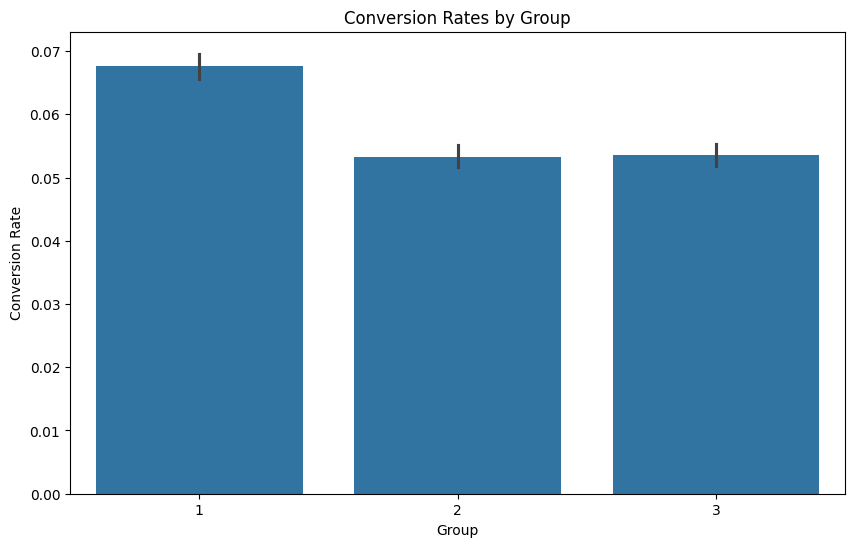

In [10]:
def perform_ab_test(data, group_column, conversion_column):
    # Split data into groups
    group_a = data[data[group_column] == 1]
    group_b = data[data[group_column] != 1]

    # Calculate conversion rates
    conv_rate_a = group_a[conversion_column].mean()
    conv_rate_b = group_b[conversion_column].mean()

    # Perform chi-square test
    contingency_table = pd.crosstab(data[group_column], data[conversion_column])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    # Calculate effect size (Cramer's V)
    n = contingency_table.sum().sum()
    cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

    return conv_rate_a, conv_rate_b, p_value, cramer_v

def plot_results(data, group_column, conversion_column):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=group_column, y=conversion_column, data=data)
    plt.title('Conversion Rates by Group')
    plt.xlabel('Group')
    plt.ylabel('Conversion Rate')
    plt.show()

# Perform A/B test
conv_rate_a, conv_rate_b, p_value, effect_size = perform_ab_test(grocery_data, 'ServerID', 'VisitPageFlag')

# Print results
print(f"Conversion Rate A: {conv_rate_a:.2%}")
print(f"Conversion Rate B: {conv_rate_b:.2%}")
print(f"P-value: {p_value:.4f}")
print(f"Effect Size (Cramer's V): {effect_size:.4f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("The difference is statistically significant.")
    if conv_rate_a > conv_rate_b:
        print("Group A (ServerID = 1) performs better.")
    else:
        print("Group B (ServerID != 1) performs better.")
else:
    print("The difference is not statistically significant.")

# Visualize results
plot_results(grocery_data, 'ServerID', 'VisitPageFlag')

Statistical Significance: The difference between the groups is statistically significant. This means that the observed differences in conversion rates are unlikely to have occurred by chance.

Better Performing Group: Group A (ServerID = 1) performs better than the other groups. This is clearly stated in the text output and visible in the bar chart, where Group 1 has a notably higher conversion rate.

Conversion Rates:
Group 1 (ServerID = 1) has the highest conversion rate, around 6.8%
Groups 2 and 3 have lower conversion rates, both around 5.3-5.4%

Effect Size: The effect size (Cramer's V) is 0.0286. This indicates a small effect size, suggesting that while the difference is statistically significant, the practical impact might be limited.

Multiple Groups: The bar chart shows three groups instead of two, indicating that the ServerID actually has three levels (1, 2, and 3) rather than just two as initially assumed in the A/B test setup.

Consistency: Groups 2 and 3 have very similar conversion rates, while Group 1 stands out with a higher rate.

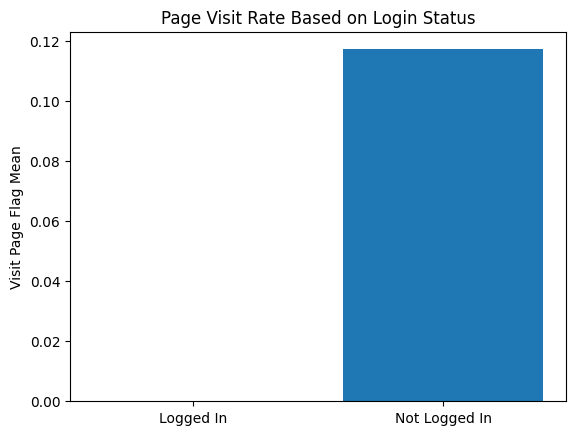

In [13]:
# Test 1: Impact of LoggedInFl on VisitPageFlag
logged_in_visits = grocery_data[grocery_data['LoggedInFlag'] == 1]['VisitPageFlag'].mean()
not_logged_in_visits = grocery_data[grocery_data['LoggedInFlag'] == 0]['VisitPageFlag'].mean()

# Plot comparison
labels = ['Logged In', 'Not Logged In']
values = [logged_in_visits, not_logged_in_visits]

plt.bar(labels, values)
plt.title('Page Visit Rate Based on Login Status')
plt.ylabel('Visit Page Flag Mean')
plt.show()

In [14]:
# Statistical test to check if the difference is significant
stat, p_value = stats.ttest_ind(grocery_data[grocery_data['LoggedInFlag'] == 1]['VisitPageFlag'],
                                grocery_data[grocery_data['LoggedInFlag'] == 0]['VisitPageFlag'])

print(f"Test 1: t-statistic = {stat}, p-value = {p_value}")

Test 1: t-statistic = -111.1094457560408, p-value = 0.0


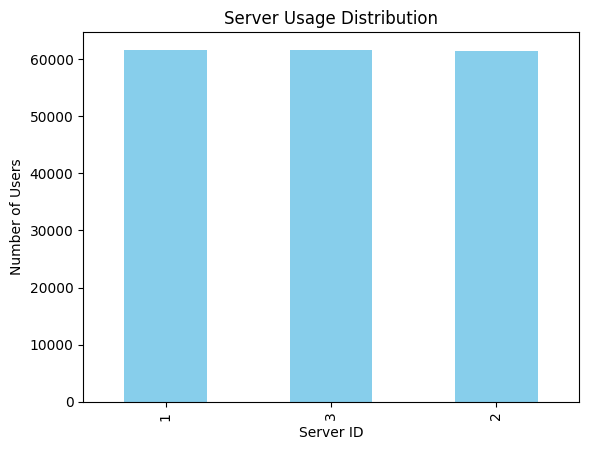

In [15]:
# Test 2: Server Distribution
server_distribution = grocery_data['ServerID'].value_counts()

# Plot server distribution
server_distribution.plot(kind='bar', color='skyblue')
plt.title('Server Usage Distribution')
plt.xlabel('Server ID')
plt.ylabel('Number of Users')
plt.show()

An IP Address may have visited the page more than once. So that this doesn't affect the results, I reduce the Visit value to 1 for users with multiple visits.

In [33]:
grocery_data = grocery_data.groupby(["IP Address", "LoggedInFlag", "ServerID"])["VisitPageFlag"].sum()

In [34]:
grocery_data = grocery_data.reset_index(name="VisitPageFlagSum")
grocery_data.head()

,IP Address,LoggedInFlag,ServerID,VisitPageFlagSum
0,0.0.108.2,0,1,0
1,0.0.109.6,1,1,0
2,0.0.111.8,0,3,0
3,0.0.160.9,1,2,0
4,0.0.163.1,0,2,0


In [35]:
grocery_data["VisitPageFlag"] = grocery_data["VisitPageFlagSum"].apply(lambda x: 1 if x != 0 else 0)
grocery_data.head()

,IP Address,LoggedInFlag,ServerID,VisitPageFlagSum,VisitPageFlag
0,0.0.108.2,0,1,0,0
1,0.0.109.6,1,1,0,0
2,0.0.111.8,0,3,0,0
3,0.0.160.9,1,2,0,0
4,0.0.163.1,0,2,0,0


In [36]:
#split the dataset into Test and Control groups. perform this operation with the help of ServerID. ServerID 1 as Test group and ServerID 2 and 3 as Control group.

grocery_data['group'] = grocery_data['ServerID'].map({1:'Test', 2:'Control', 3:'Control'})
grocery_data.drop(['ServerID','VisitPageFlagSum'],axis=1, inplace=True)
grocery_data.head()

,IP Address,LoggedInFlag,VisitPageFlag,group
0,0.0.108.2,0,0,Test
1,0.0.109.6,1,0,Test
2,0.0.111.8,0,0,Control
3,0.0.160.9,1,0,Control
4,0.0.163.1,0,0,Control


In [37]:
df_control = grocery_data[grocery_data['group'] == 'Control'].copy()
df_control.reset_index(inplace=True, drop = True)

In [38]:
df_test = grocery_data[grocery_data['group'] == 'Test'].copy()
df_test.reset_index(inplace=True, drop = True)

In [39]:
df_control.head()

,IP Address,LoggedInFlag,VisitPageFlag,group
0,0.0.111.8,0,0,Control
1,0.0.160.9,1,0,Control
2,0.0.163.1,0,0,Control
3,0.0.178.9,1,0,Control
4,0.0.185.4,1,0,Control


In [40]:
df_test.head()

,IP Address,LoggedInFlag,VisitPageFlag,group
0,0.0.108.2,0,0,Test
1,0.0.109.6,1,0,Test
2,0.0.169.1,1,0,Test
3,0.0.181.9,0,1,Test
4,0.0.195.5,1,0,Test


Examine descriptive statistics for control group

In [41]:
df_control.describe().T

,count,mean,std,min,25%,50%,75%,max
LoggedInFlag,66460.0,0.503912,0.499988,0.0,0.0,1.0,1.0,1.0
VisitPageFlag,66460.0,0.092251,0.289382,0.0,0.0,0.0,0.0,1.0


In [42]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
LoggedInFlag,33303.0,0.503258,0.499997,0.0,0.0,1.0,1.0,1.0
VisitPageFlag,33303.0,0.115515,0.319647,0.0,0.0,0.0,0.0,1.0


In the control data set, let's calculate the ratio of those who enter the page we want, compared to all those who enter the site.

In [43]:
control_sum_visit = df_control['VisitPageFlag'].count()
print("Sum visit for control group: ", control_sum_visit)
control_visit_1 = df_control[df_control['VisitPageFlag'] ==1]['VisitPageFlag'].count()
print("Visit Page target = 1 : ", control_visit_1)

Sum visit for control group:  66460
Visit Page target = 1 :  6131


In [44]:
control_ratio_visit = control_visit_1/control_sum_visit
control_ratio_visit

0.09225097803189888

We calculate the same ratio within the Test group.

In [45]:
test_sum_visit = df_test['VisitPageFlag'].count()
print("Sum visit for test group: ", test_sum_visit)
test_visit_1 = df_test[df_test['VisitPageFlag'] ==1]['VisitPageFlag'].count()
print("Visit Page target = 1 : ", test_visit_1)

Sum visit for test group:  33303
Visit Page target = 1 :  3847


In [46]:
test_ratio_visit = test_visit_1/test_sum_visit
test_ratio_visit

0.11551511875806984

When we look directly at the click rates, we see that there is a difference between the two groups. It seems that the new feature applied to the test group is getting more clicks. But this result can be misleading. Therefore, we should seek an answer to the question of whether there is a statistically significant difference. Now we will run A/B testing.

For A/B testing to be applied, the data set must satisfy the Normality and Variance homogeneity assumptions. Then, it can be passed to the implementation of the hypothesis tests.

If normality and variance homogeneity is provided, an independent two-sample t-test (parametric test) is applied.
If normality and homogeneity of variance are not provided, the Mann-Whitney U test (non-parametric test) is performed. How to check the assumption of normality? In this, we will first determine the H0 and H1 hypotheses.
H0 : The assumption of normality is provided.
H1 : The assumption of normality is not provided.
Now let's check the assumption of normality.

## Normality Assumption

In [47]:
test_stat, pvalue = shapiro(df_control["VisitPageFlag"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.3267, p-value = 0.0000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 66460.
  res = hypotest_fun_out(*samples, **kwds)


In [48]:
test_stat, pvalue = shapiro(df_test["VisitPageFlag"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.3711, p-value = 0.0000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 33303.
  res = hypotest_fun_out(*samples, **kwds)


H0 is rejected because the p-value is <0.05. The assumption of normality was not provided.

Therefore, we will use the Mann-Whitney U test.

H0 : There is no significant difference between the two groups in terms of click rate to the desired page.

H1 : There is a difference.

## Mann-Whitney U Test

In [49]:
test_stat, pvalue = mannwhitneyu(df_control["VisitPageFlag"],
                                 df_test["VisitPageFlag"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 1080913226.5000, p-value = 0.0000


H0 is rejected because p-value<0.05. In other words, we can say statistically that there is a difference between the two groups.

In [51]:
group_count = grocery_data.groupby(['group', 'VisitPageFlag'])['group'].count().reset_index(name='Count')
groupped = pd.crosstab(group_count['group'], group_count['VisitPageFlag'], values=group_count['Count'], aggfunc=np.sum, margins=True)

<ipython-input-51-af6a03884ff8>:2: FutureWarning: The provided callable <function sum at 0x7c322bb17370> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  groupped = pd.crosstab(group_count['group'], group_count['VisitPageFlag'], values=group_count['Count'], aggfunc=np.sum, margins=True)
<ipython-input-51-af6a03884ff8>:2: FutureWarning: The provided callable <function sum at 0x7c322bb17370> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  groupped = pd.crosstab(group_count['group'], group_count['VisitPageFlag'], values=group_count['Count'], aggfunc=np.sum, margins=True)
<ipython-input-51-af6a03884ff8>:2: FutureWarning: The provided callable <function sum at 0x7c322bb17370> is currently using DataFrameGroupBy.sum. In a future version of pan

In [52]:
100*groupped.div(groupped['All'], axis=0)

VisitPageFlag,0,1,All
group,,,
Control,90.774902,9.225098,100.0
Test,88.448488,11.551512,100.0
All,89.998296,10.001704,100.0


## Conclusion

While the rate of clicking on the link was 9.22% in the Control group, this rate increased to 11.55% in the Test group. As a result of our tests, we can say that this rate increase is not accidental, but has been proven statistically.